In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# sklearn library
from sklearn import linear_model
import seaborn as sns


In [2]:
df=pd.read_csv(r'C:\Users\medin\3\forestfires.csv')

In [3]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [4]:
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [5]:
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [6]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [7]:
df.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Yangın alanı > 0 ise, değeri 1 olarak ayarlayın ve sütun adını alandan etikete değiştirin, böylece bir sınıflandırma problemi olarak görebiliriz.

In [8]:
df['area'].values[df['area'].values > 0] = 1
df = df.rename(columns={'area': 'label'})
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,label
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,1.0
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,1.0
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,1.0
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.0


In [9]:
df.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,label
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.062491
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.056892
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.130329
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,-0.042970
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.073823
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.062672
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.096724
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.035663
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.076047
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.035587


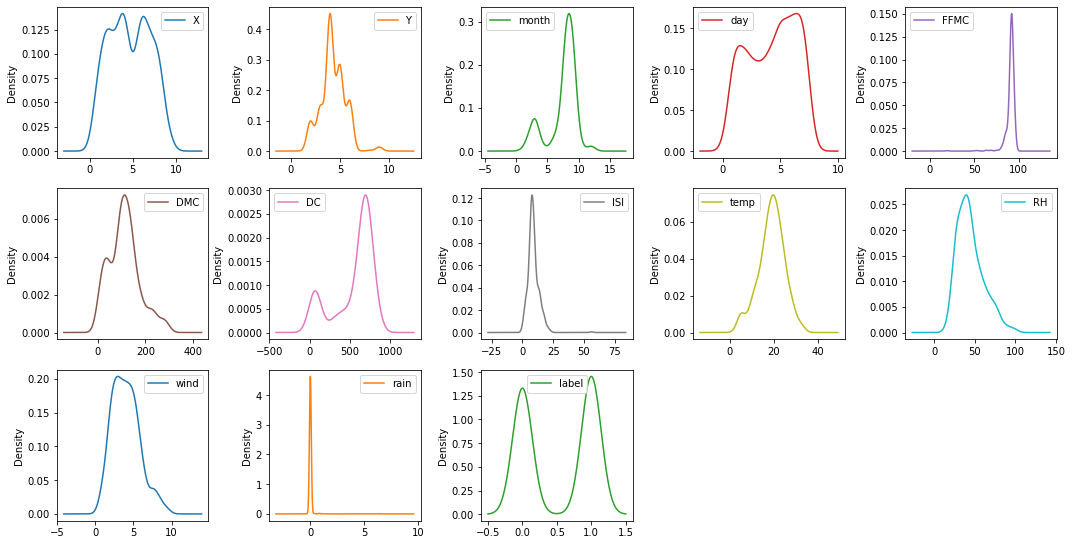

In [10]:
df.plot(kind="density", layout=(6,5),subplots=True,sharex=False, sharey=False, figsize=(15,15));
plt.tight_layout()

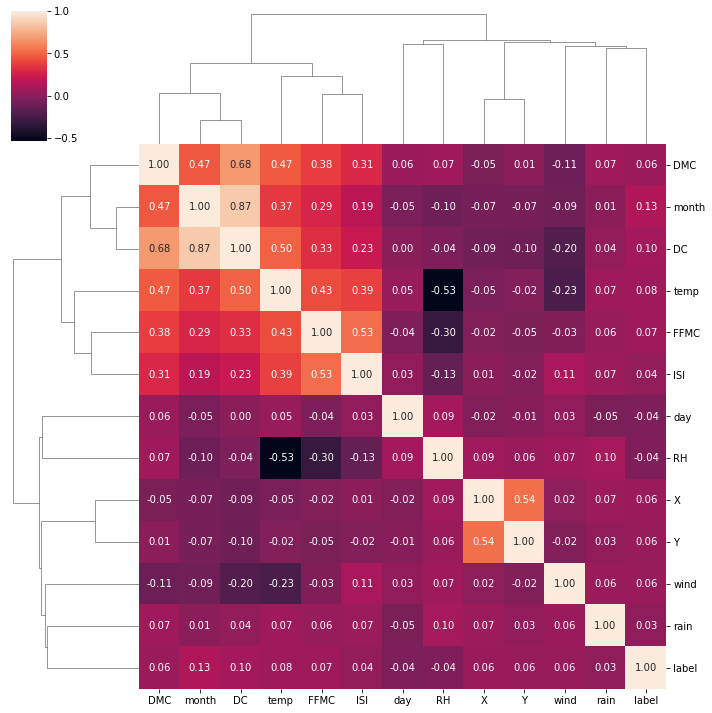

In [11]:
# Correlation #nümerik değerlere sahip bir setim olduğu için korelasyon uyguladım. #korelasyon haritası çalış
corr_matrix = df.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.show()

In [12]:
df['label'].value_counts()

1.0    270
0.0    247
Name: label, dtype: int64

<AxesSubplot:ylabel='label'>

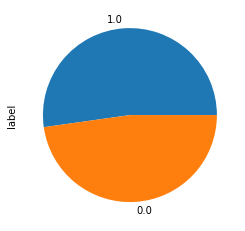

In [13]:
df['label'].value_counts().plot.pie()

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'label'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

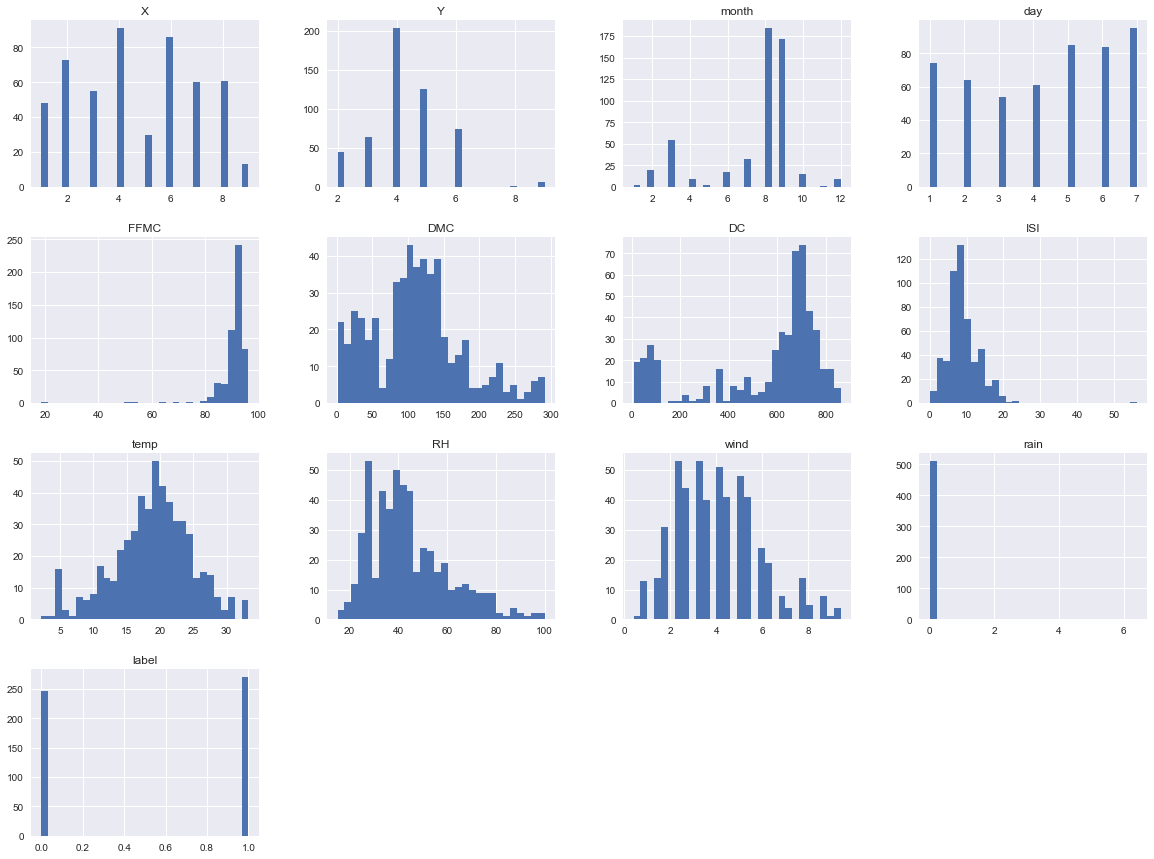

In [34]:
# Libraries and configurations for figure plotting
plt.style.use('seaborn')
df.hist(bins=30, figsize=(20,15)) # plotting the histogram

Üçüncü en yüksek korelasyon katsayılarının "ay", "DC", "temp" olacağını bulabiliriz.

In [14]:
df.corr()['label'].sort_values(ascending=False)

label    1.000000
month    0.130329
DC       0.096724
temp     0.076047
FFMC     0.073823
DMC      0.062672
X        0.062491
Y        0.056892
wind     0.055702
ISI      0.035663
rain     0.025550
RH      -0.035587
day     -0.042970
Name: label, dtype: float64

Logistic Regression Classification

In [15]:
# Logistic Regression Classification
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
scaler = StandardScaler()
scaler.fit(df.drop('label',axis=1))
scaled_features = scaler.transform(df.drop('label',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,1.008313,0.569860,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268
1,1.008313,-0.244001,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268
2,1.008313,-0.244001,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268
3,1.440925,1.383722,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155
4,1.440925,1.383722,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268


In [17]:
X = df_feat
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [18]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

from sklearn import metrics
logmodel.score(X_train,y_train)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))



Accuracy: 0.48717948717948717
Precision: 0.5393258426966292
Recall: 0.5517241379310345


In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[28 41]
 [39 48]]
              precision    recall  f1-score   support

         0.0       0.42      0.41      0.41        69
         1.0       0.54      0.55      0.55        87

    accuracy                           0.49       156
   macro avg       0.48      0.48      0.48       156
weighted avg       0.49      0.49      0.49       156



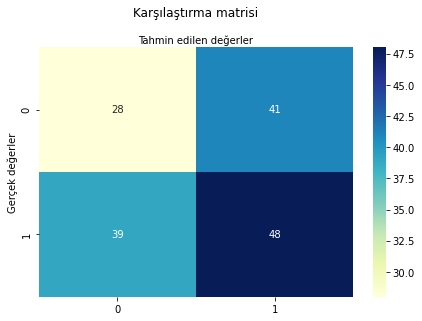

In [20]:
import numpy as np
cnf_matrix = confusion_matrix(y_test, predictions)
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt ='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Karşılaştırma matrisi', y = 1.1)
plt.ylabel('Gerçek değerler')
plt.xlabel('Tahmin edilen değerler')
plt.show()


In [21]:
classes={0:'Yangın Yok',1:'Yangın Var'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=logmodel.predict(x_new)
print(classes[y_predict[0]])

Yangın Yok


K EN YAKIN KOMŞULUK SINIFLANDIRMA

In [22]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [23]:
X = df.drop('label', axis=1)
y = df['label']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)

In [44]:
sayac = 1
for i in range(1,15):
    knn_yeni = KNeighborsClassifier(n_neighbors = i)
    knn_yeni.fit(X_train, y_train)
    print(sayac, " ", "Dogruluk orani %", knn_yeni.score(X_test,y_test)*100)
    sayac += 1

1   Dogruluk orani % 55.769230769230774
2   Dogruluk orani % 49.358974358974365
3   Dogruluk orani % 51.28205128205128
4   Dogruluk orani % 53.84615384615385
5   Dogruluk orani % 58.97435897435898
6   Dogruluk orani % 59.61538461538461
7   Dogruluk orani % 55.12820512820513
8   Dogruluk orani % 57.05128205128205
9   Dogruluk orani % 59.61538461538461
10   Dogruluk orani % 59.61538461538461
11   Dogruluk orani % 61.53846153846154
12   Dogruluk orani % 60.89743589743589
13   Dogruluk orani % 60.256410256410255
14   Dogruluk orani % 61.53846153846154


In [45]:
# fit a k-nearest neighbor model to the data
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train, y_train)

print(knn)
# make predictions
predicted = knn.predict(X_test)
# summarize the fit of the model


print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Precision:",metrics.precision_score(y_test, predicted))
print("Recall:",metrics.recall_score(y_test, predicted))



KNeighborsClassifier(n_neighbors=12)
Accuracy: 0.6089743589743589
Precision: 0.703125
Recall: 0.5172413793103449


In [46]:
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.54      0.72      0.62        69
         1.0       0.70      0.52      0.60        87

    accuracy                           0.61       156
   macro avg       0.62      0.62      0.61       156
weighted avg       0.63      0.61      0.61       156

[[50 19]
 [42 45]]


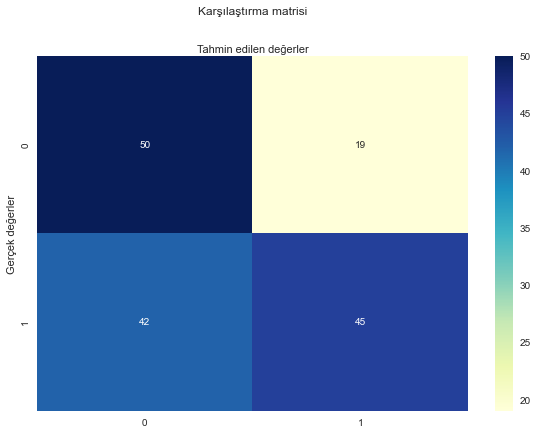

In [47]:
cnf_matrix = confusion_matrix(y_test, predicted)
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt ='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Karşılaştırma matrisi', y = 1.1)
plt.ylabel('Gerçek değerler')
plt.xlabel('Tahmin edilen değerler')
plt.show()


In [48]:
classes={0:'Yangın Yok',1:'Yangın Var'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=knn.predict(x_new)
print(classes[y_predict[0]])

Yangın Var
